In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import autokeras as ak


In [15]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish_D3_I7000_F9000/TPath_300_finish_data_D3.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.00000,-0.00200,300,7000,9000,532.25
1,0.00000,-0.00196,300,7000,9000,549.09
2,0.00000,-0.00192,300,7000,9000,565.57
3,0.00000,-0.00188,300,7000,9000,581.72
4,0.00000,-0.00184,300,7000,9000,597.71
...,...,...,...,...,...,...
6358,0.00248,0.00184,300,7000,9000,571.28
6359,0.00248,0.00188,300,7000,9000,527.25
6360,0.00248,0.00192,300,7000,9000,486.25
6361,0.00248,0.00196,300,7000,9000,478.02


In [16]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
0,0.00000,-0.00200,532.25
1,0.00000,-0.00196,549.09
2,0.00000,-0.00192,565.57
3,0.00000,-0.00188,581.72
4,0.00000,-0.00184,597.71
...,...,...,...
6358,0.00248,0.00184,571.28
6359,0.00248,0.00188,527.25
6360,0.00248,0.00192,486.25
6361,0.00248,0.00196,478.02


In [17]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

      X-Koordinate  Y-Koordinate  Temperatur
6243       0.00244       0.00128      722.51
2949       0.00116      -0.00120      795.43
393        0.00012       0.00160      617.75
3844       0.00152      -0.00176      637.29
2154       0.00084      -0.00068      876.04
...            ...           ...         ...
3772       0.00148      -0.00060      848.53
5191       0.00204      -0.00040      798.96
5226       0.00204       0.00100      769.47
5390       0.00212      -0.00052      788.09
860        0.00032       0.00008      909.37

[6363 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,0.00244,0.00128,722.51
1,0.00116,-0.00120,795.43
2,0.00012,0.00160,617.75
3,0.00152,-0.00176,637.29
4,0.00084,-0.00068,876.04
...,...,...,...
6358,0.00148,-0.00060,848.53
6359,0.00204,-0.00040,798.96
6360,0.00204,0.00100,769.47
6361,0.00212,-0.00052,788.09


In [18]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [19]:
X

,X-Koordinate,Y-Koordinate
0,0.00244,0.00128
1,0.00116,-0.00120
2,0.00012,0.00160
3,0.00152,-0.00176
4,0.00084,-0.00068
...,...,...
6358,0.00148,-0.00060
6359,0.00204,-0.00040
6360,0.00204,0.00100
6361,0.00212,-0.00052


In [20]:
y

0       722.51
1       795.43
2       617.75
3       637.29
4       876.04
         ...  
6358    848.53
6359    798.96
6360    769.47
6361    788.09
6362    909.37
Name: Temperatur, Length: 6363, dtype: float64

In [21]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [22]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze gleiche Skalierungsparameter ohne das X_Test Informationen einfließen

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [23]:
X_train_scaled

array([[0.96774194, 0.58      ],
       [0.12903226, 0.07      ],
       [0.03225806, 0.07      ],
       ...,
       [0.01612903, 0.25      ],
       [0.67741935, 0.82      ],
       [0.5483871 , 0.65      ]])

In [24]:
y_train_scaled.max()

1.0

In [25]:
# Lernplan erstellen
#initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [36]:
# Netzwerkarchitektur
model = Sequential([
    # Eingabeschicht
    Dense(32, activation='relu', input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Versteckte Schicht
    Dense(448, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(352, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(320, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(416, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(96, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),

    
    #Dropout(0.01),
    # Ausgabeschicht für Regression (1 Einheit ohne Aktivierungsfunktion)
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = 'adam' #Adam(learningrate =  0.001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', restore_best_weights=True, min_delta = 0.0001)

# Trainingsparameter
batch_size = 50
epochs = 500

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/500
82/82 [==============================] - 3s 9ms/step - loss: 25.6946 - mae: 0.3030 - val_loss: 14.6967 - val_mae: 0.2134
Epoch 2/500
82/82 [==============================] - 1s 6ms/step - loss: 10.3017 - mae: 0.1646 - val_loss: 7.1539 - val_mae: 0.1306
Epoch 3/500
82/82 [==============================] - 1s 6ms/step - loss: 5.5076 - mae: 0.1186 - val_loss: 4.1614 - val_mae: 0.1110
Epoch 4/500
82/82 [==============================] - 1s 6ms/step - loss: 3.3154 - mae: 0.1155 - val_loss: 2.5914 - val_mae: 0.1057
Epoch 5/500
82/82 [==============================] - 1s 7ms/step - loss: 2.1130 - mae: 0.1147 - val_loss: 1.6976 - val_mae: 0.1201
Epoch 6/500
82/82 [==============================] - 1s 6ms/step - loss: 1.4169 - mae: 0.1176 - val_loss: 1.1696 - val_mae: 0.1126
Epoch 7/500
82/82 [==============================] - 1s 6ms/step - loss: 1.0000 - mae: 0.1168 - val_loss: 0.8476 - val_mae: 0.1184
Epoch 8/500
82/82 [==============================] - 1s 7ms/step - loss: 0.7411 

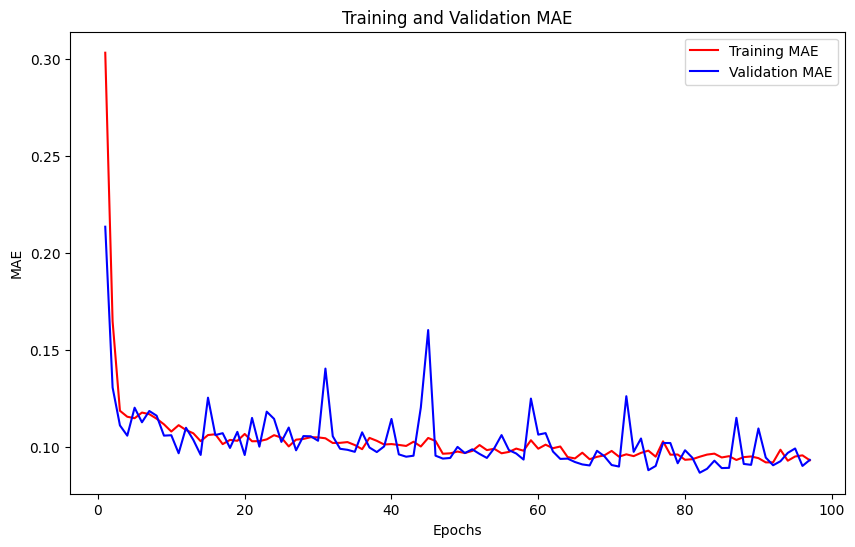

In [37]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [35]:
scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")
    
    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)
    
    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

 Bsp. Predicted: [860.07574] Actual: [883.01] 
Durchschnittliche Abweichung (MAE): [38.6838481]


# GridSearch

In [32]:
from keras_tuner import RandomSearch
 
# Definieren der Funktion, die das Modell erstellt
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('input_units', min_value=32, max_value=512, step=32), input_shape=(2,), activation='relu'))
    # Hinzufügen von Schichten basierend auf dem Suchraum
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f'units_{i}', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Erstellen des RandomSearch Objekts
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,  # Anzahl der zu testenden Modellkonfigurationen
    executions_per_trial=1,  # Anzahl der Male, die jede Modellkonfiguration trainiert wird
    directory='random_search',  # Verzeichnis zur Speicherung der Suchlogs
    project_name='neural_network_optimization_D3'
)

# Durchführung des Random Search
tuner.search(X_train_scaled, y_train_scaled, epochs=20, batch_size=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

# Abrufen des besten Modells
best_model = tuner.get_best_models(num_models=1)[0]

# Zusammenfassung des besten Modells
best_model.summary()

# Sie können auch die besten Hyperparameter direkt abrufen
best_hyperparameters = tuner.get_best_hyperparameters()[0]
print(best_hyperparameters.values)

Trial 100 Complete [00h 00m 27s]
val_loss: 3.0344821425387636e-05

Best val_loss So Far: 1.1931638255191501e-05
Total elapsed time: 00h 37m 09s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 448)               14784     
                                                                 
 dense_2 (Dense)             (None, 352)               158048    
                                                                 
 dense_3 (Dense)             (None, 320)               112960    
                                                                 
 dense_4 (Dense)             (None, 256)               82176     
                                                                 
 dense_5 (Dense)             (None, 416)    